In [1]:
library(data.table)

In [2]:
mt = data.table(mtcars)

In [3]:
head(x = mt ,n = 3)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


### Usando o mpg ~ disp

In [4]:
head(x = mt[, list(mpg, disp) ],n = 5)

mpg,disp
<dbl>,<dbl>
21.0,160
21.0,160
22.8,108
21.4,258
18.7,360


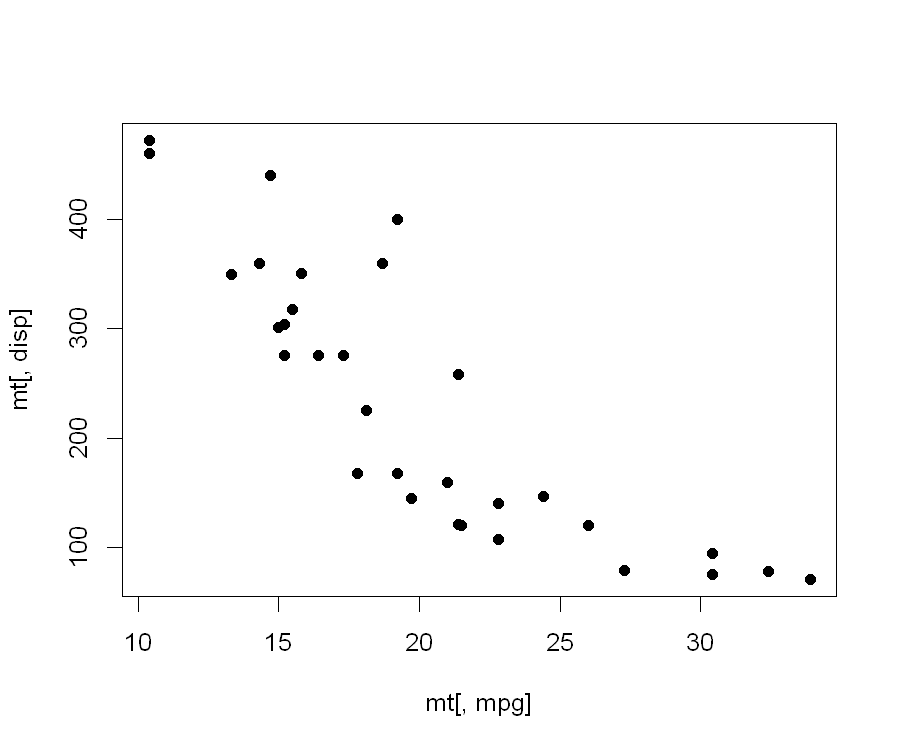

In [5]:
par(bg = 'white' , no.readonly = TRUE)
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res=150)
plot(x = mt[, mpg], y = mt[, disp], pch = 19)

In [6]:
model_1 = lm( mpg~disp ,data = mtcars)

In [7]:
model_1


Call:
lm(formula = mpg ~ disp, data = mtcars)

Coefficients:
(Intercept)         disp  
   29.59985     -0.04122  


usando o summary

In [8]:
summary(model_1)


Call:
lm(formula = mpg ~ disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
disp        -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


In [9]:
qt( p = 9.38e-10 ,df = 30)

[1] -8.471152

In [10]:
test_ = function(x, alpha=10){
    return(
        if(x < alpha) "Rejeite H_0"
        else "Aceita H_0"
    )
}

In [11]:
test_(9.38e-10, 0.1)

[1] "Rejeite H_0"

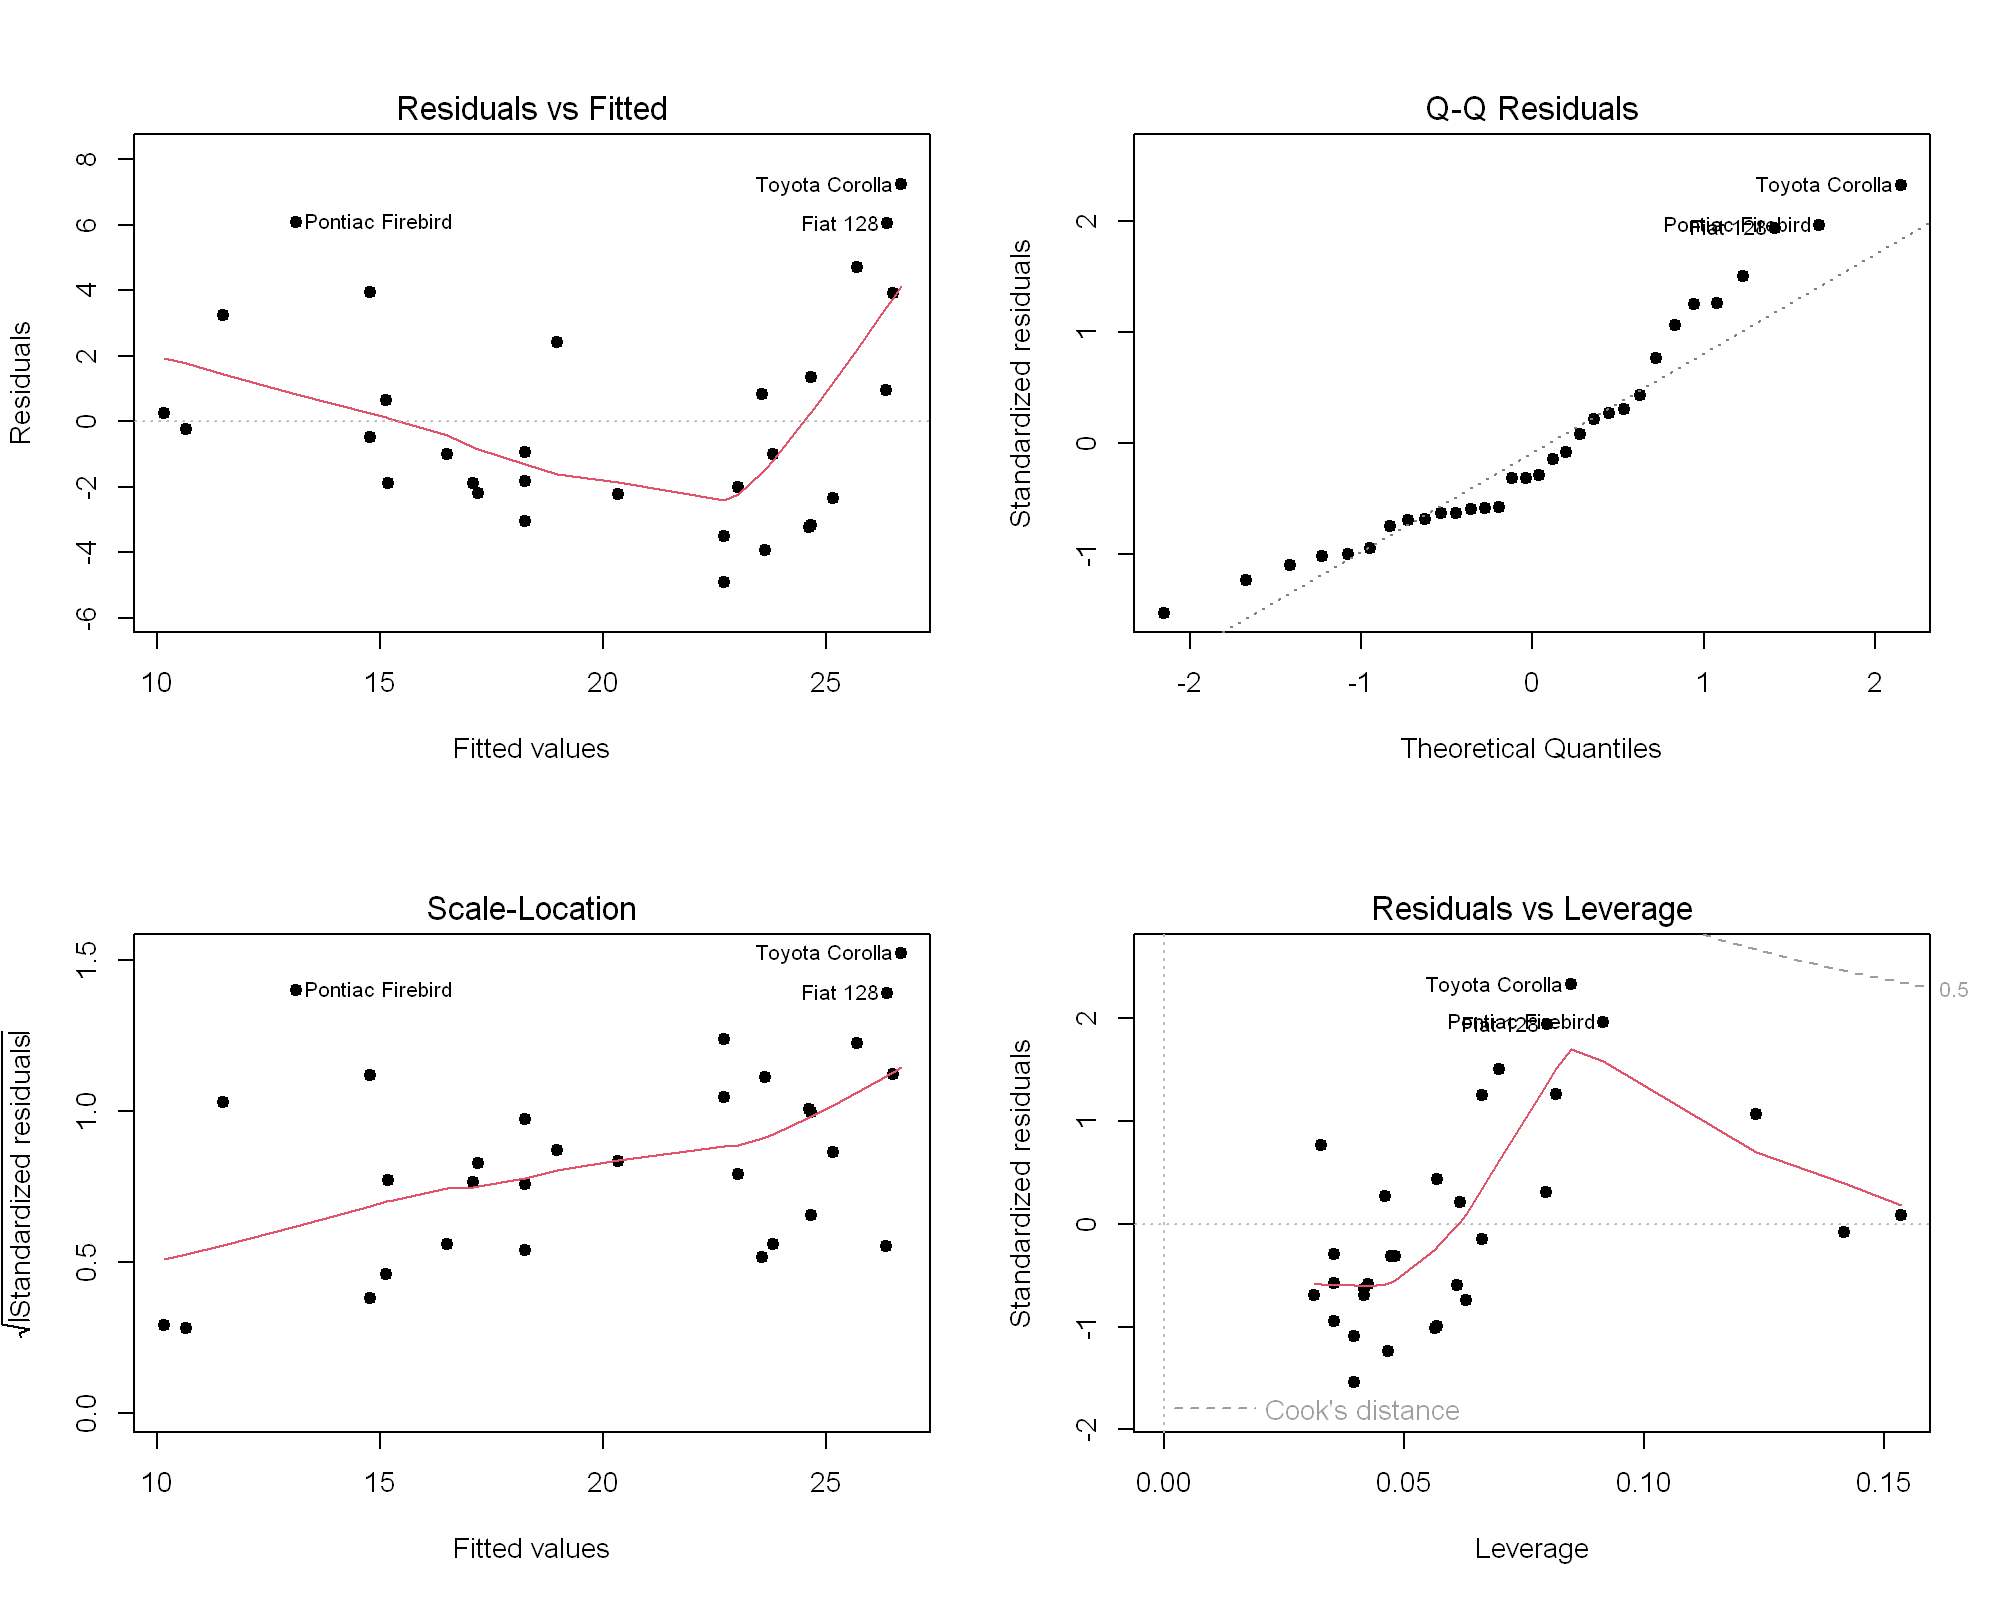

In [12]:
.Options <- NULL
par(bg = 'white' ,mfrow = c(2, 2) , no.readonly = TRUE)
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 200)
plot(model_1, pch = 19)

In [13]:
valor_ = unname(model_1$residuals)

In [14]:
shapiro.test(valor_)


	Shapiro-Wilk normality test

data:  valor_
W = 0.9271, p-value = 0.03255


In [15]:
if ( 0.03255 > 0.01 ){ 
    print('Seguem uma normal') 
}else{ 
    print('Não seguem uma normal') 
    }

[1] "Seguem uma normal"


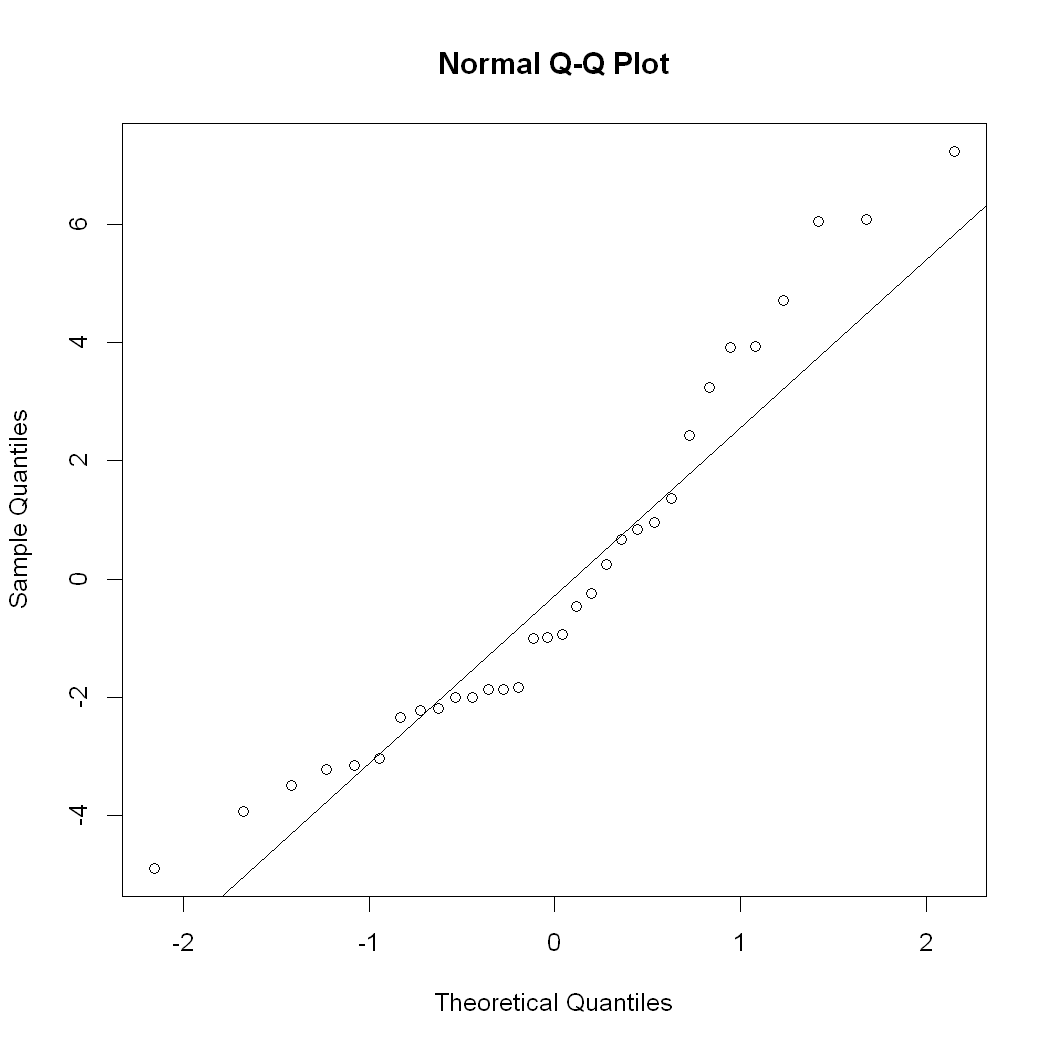

In [16]:
par( bg = 'white')
options(
    repr.plot.width = 7,    # Largura em polegadas
    repr.plot.height = 7,   # Altura em polegadas
    repr.plot.res = 150,    # Resolução em dpi
    jupyter.plot_mimetypes = "image/png"  # Formato do plot
)

qqnorm(valor_)
qqline(valor_)

In [17]:
sub_ = data.table(disp=c(10, 20, 32))

In [18]:
predict(model_1, newdata = sub_)

1        2        3 
29.18770 28.77555 28.28097

In [19]:
confint(model_1, '(Intercept)' , level = 0.90)

,5 %,95 %
(Intercept),27.5127,31.68701


&nbsp;

#### mpg~hp

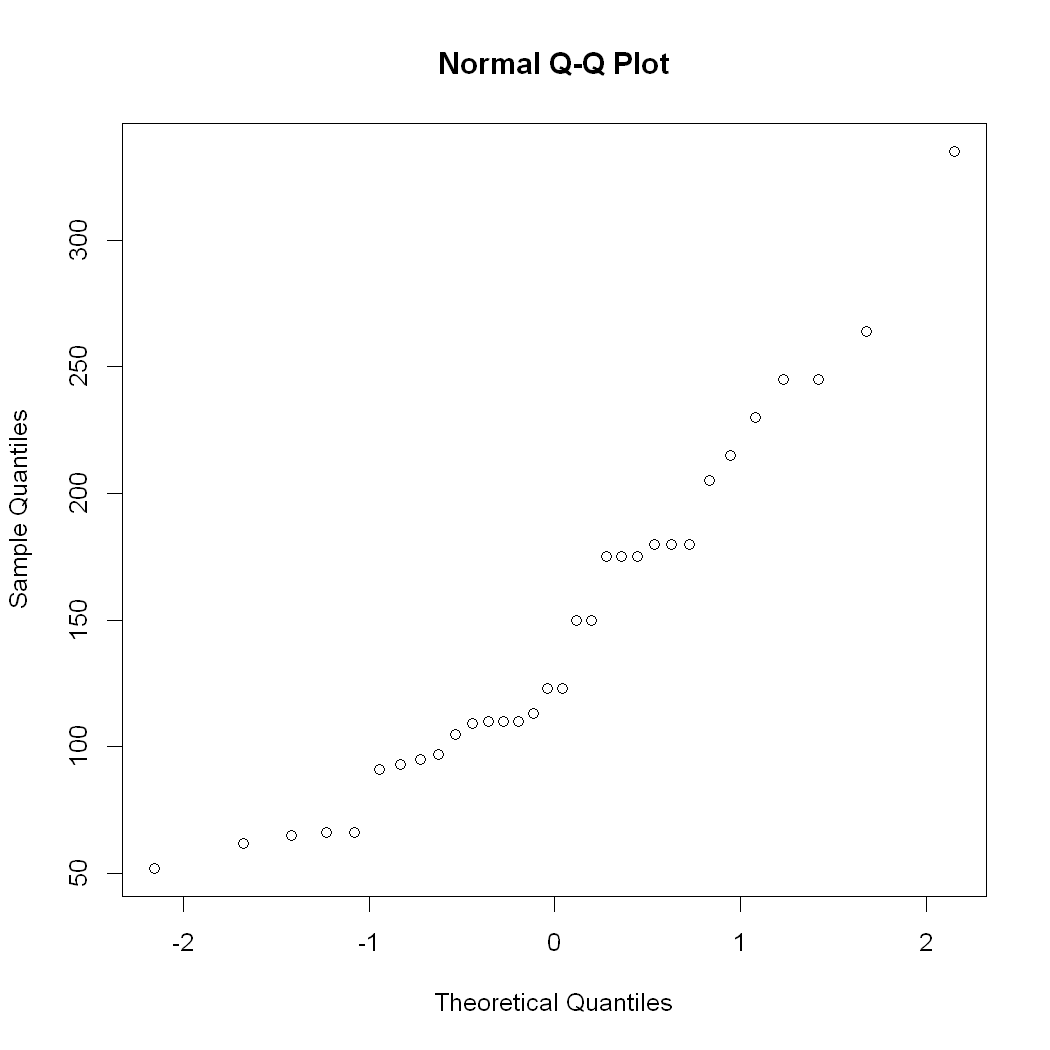

In [20]:
par( bg = 'white')
options(
    repr.plot.width = 7,    # Largura em polegadas
    repr.plot.height = 7,   # Altura em polegadas
    repr.plot.res = 150,    # Resolução em dpi
    jupyter.plot_mimetypes = "image/png"  # Formato do plot
)

qqnorm(mt[, hp])

In [21]:
model_2 = lm(mpg~hp ,data = mt)

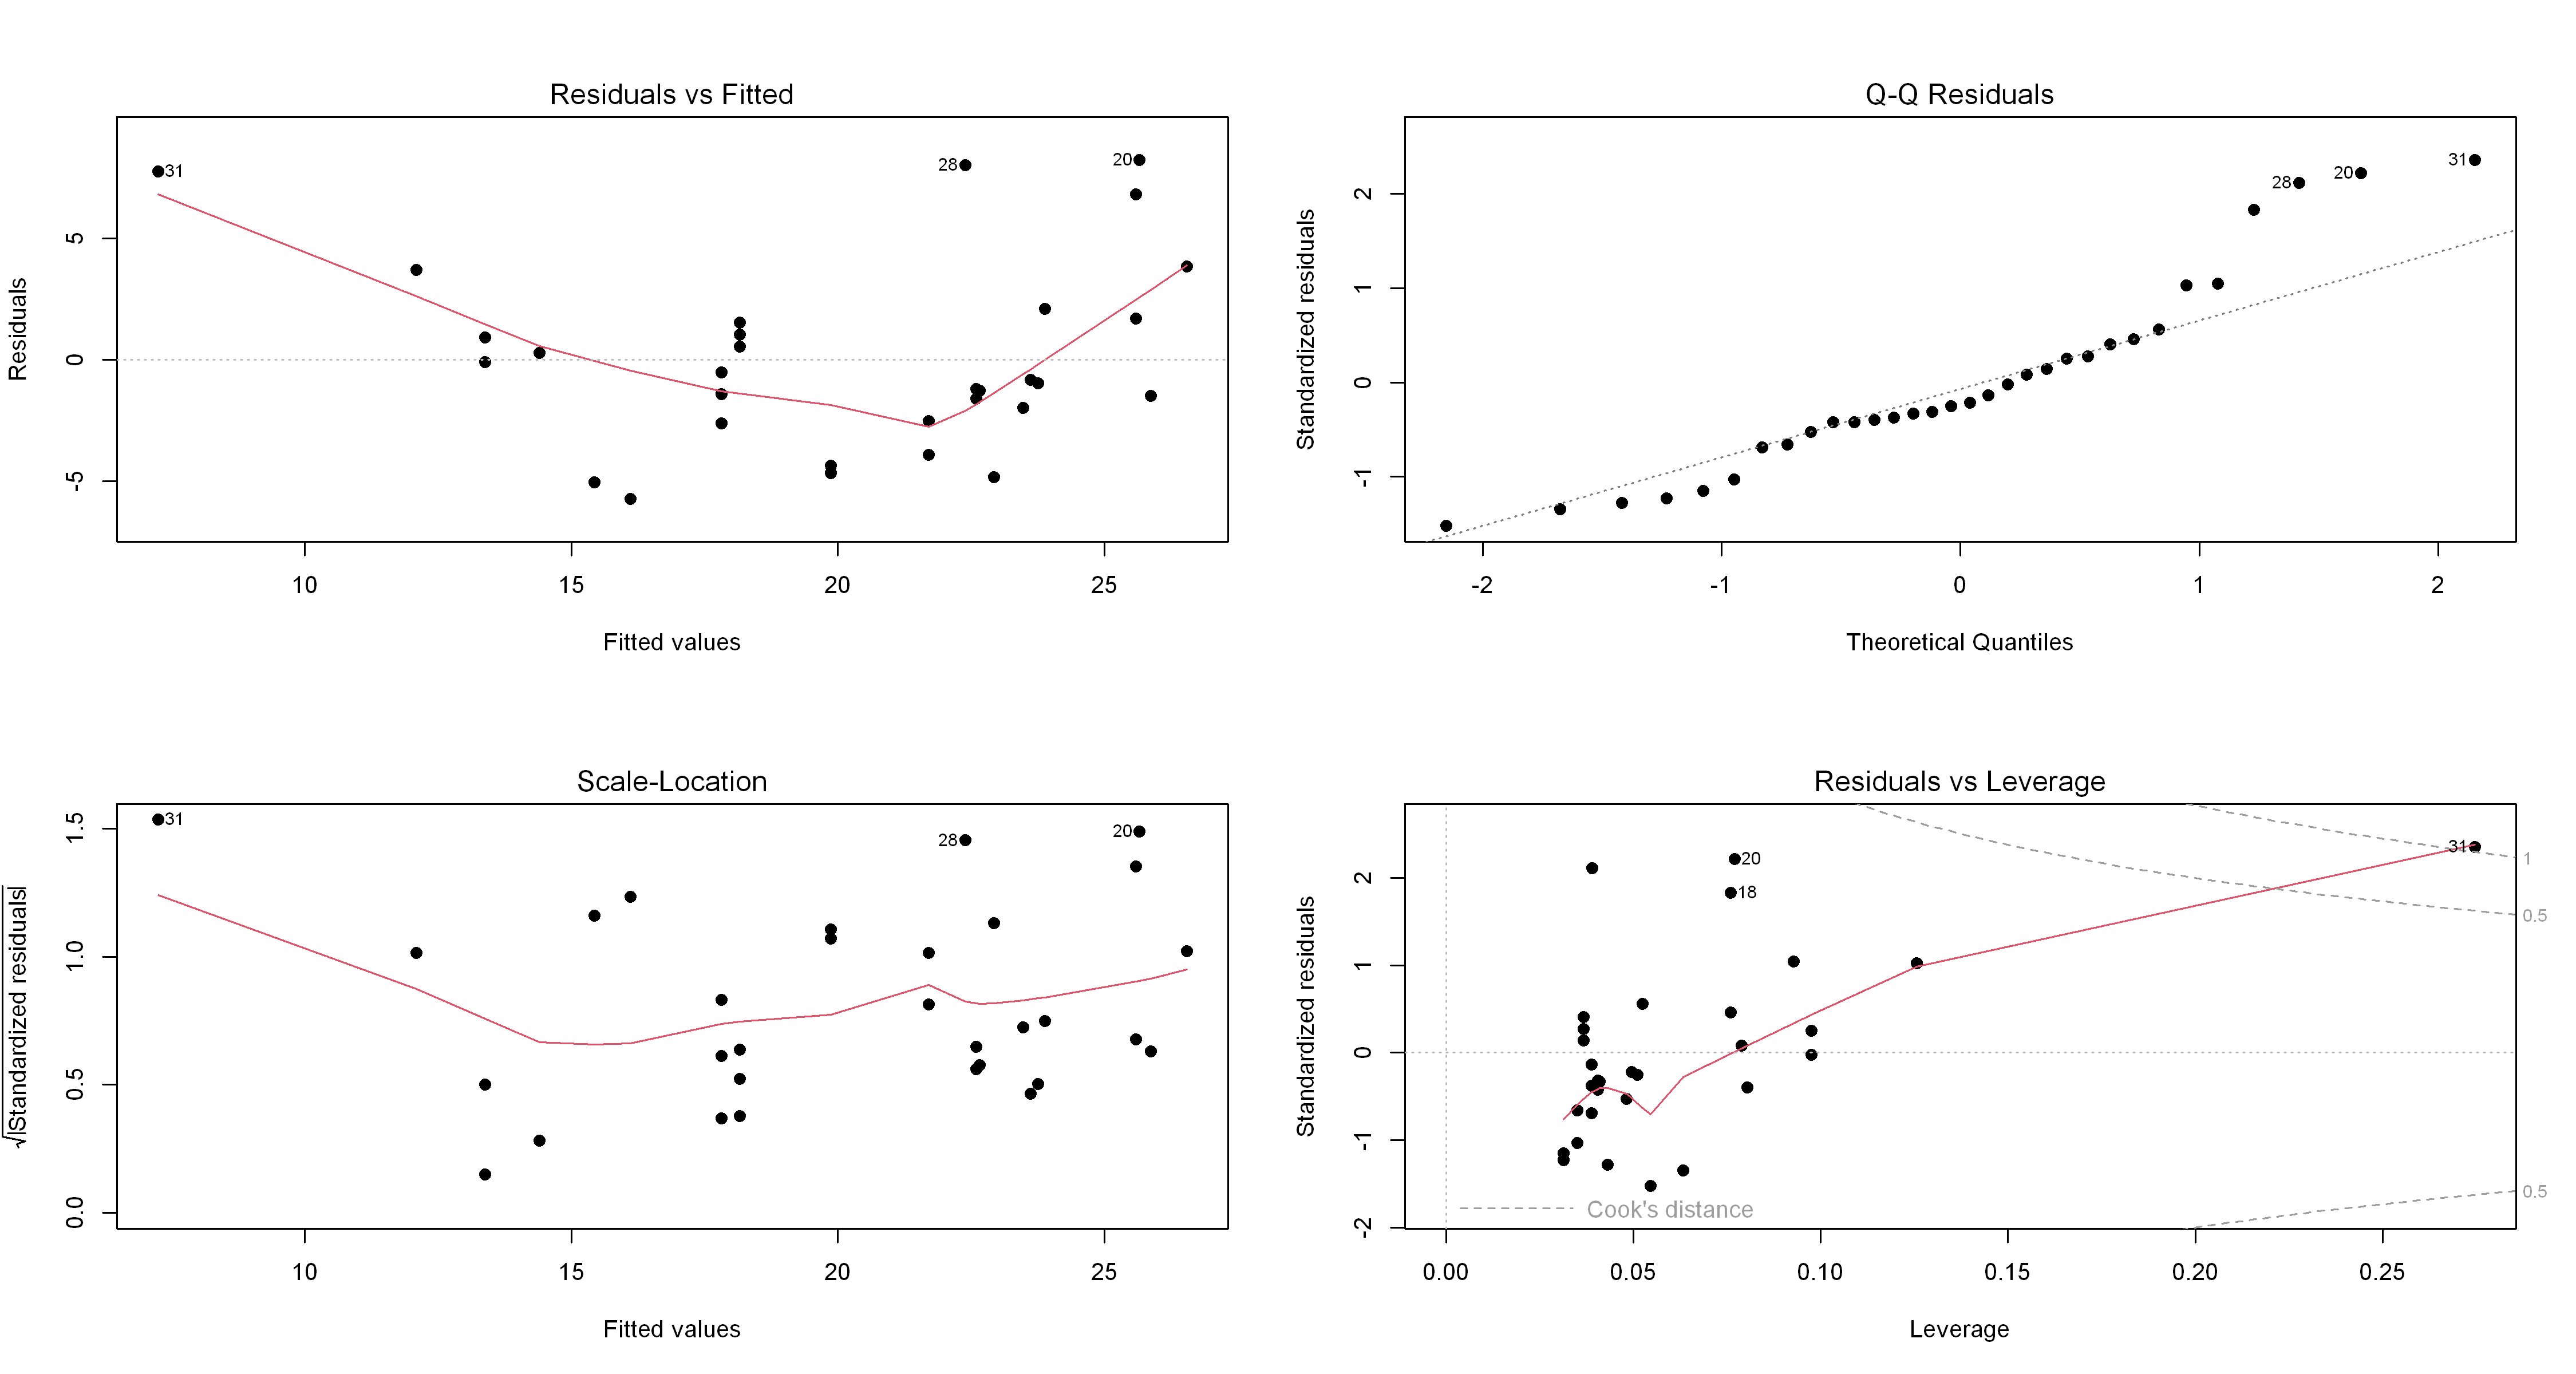

In [22]:
par(bg = 'white', mfrow = c(2, 2))
options(
    repr.plot.width = 15,    # Largura em polegadas
    repr.plot.height = 8,   # Altura em polegadas
    repr.plot.res = 300   # Resolução em dpi
)

plot(model_2, pch = 19)

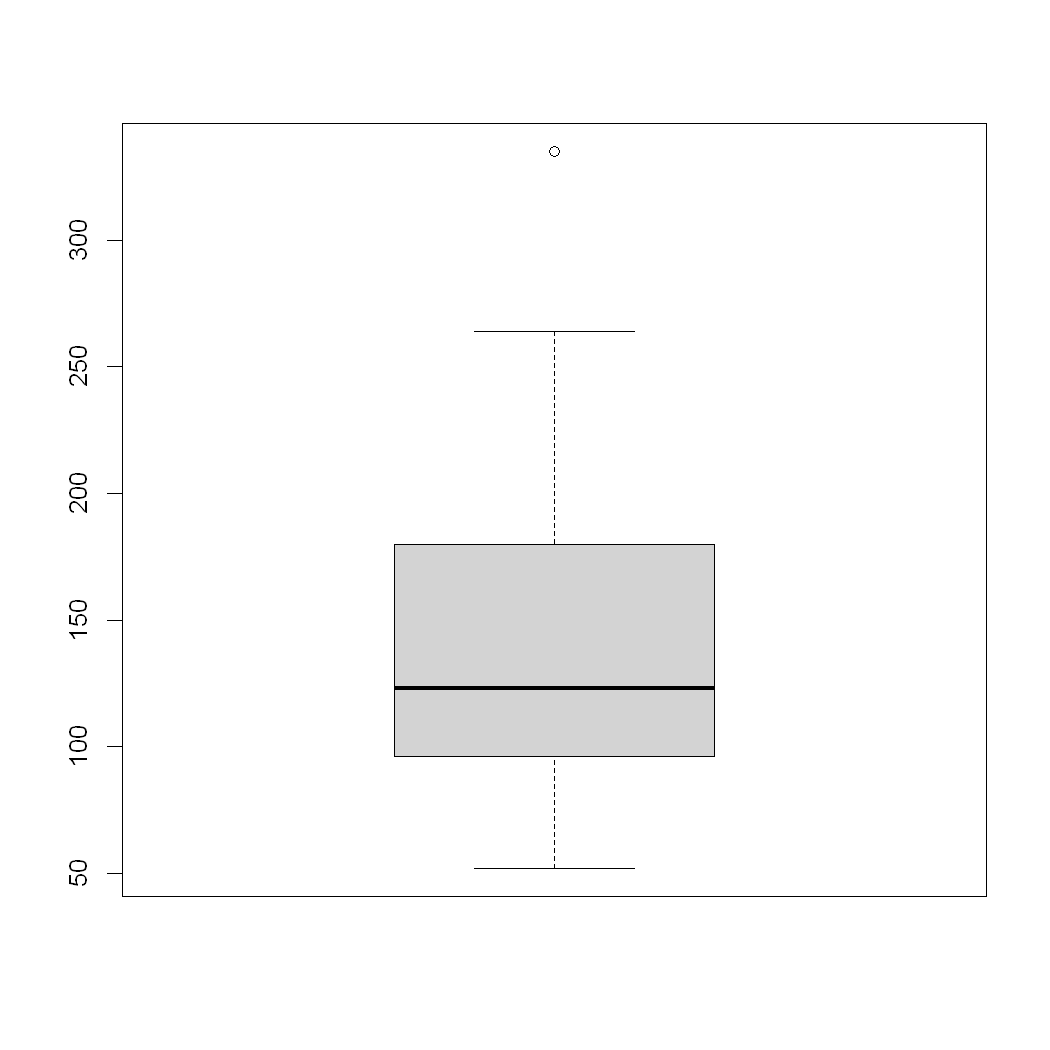

In [23]:
par(bg = 'white')
options(
    repr.plot.width = 7,    # Largura em polegadas
    repr.plot.height = 7,   # Altura em polegadas
    repr.plot.res = 150   # Resolução em dpi
)
boxplot(mt[, hp])

In [24]:
mt[, new_hp := log1p(hp)]

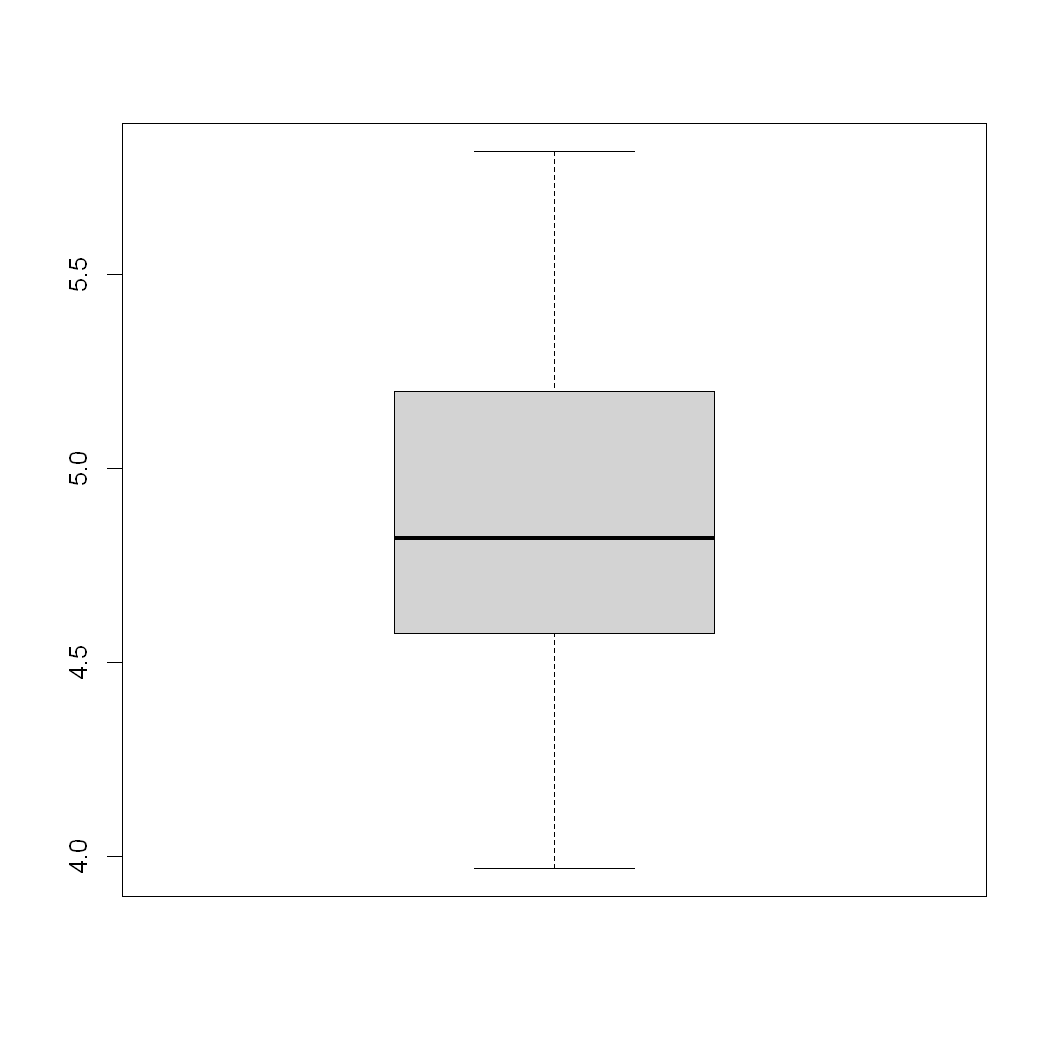

In [25]:
par(bg = 'white')
options(
    repr.plot.width = 7,    # Largura em polegadas
    repr.plot.height = 7,   # Altura em polegadas
    repr.plot.res = 150   # Resolução em dpi
)
boxplot(mt[, new_hp])

In [26]:
model_3 = lm( mpg~new_hp, data = mt) 
model_3


Call:
lm(formula = mpg ~ new_hp, data = mt)

Coefficients:
(Intercept)       new_hp  
      73.15       -10.85  


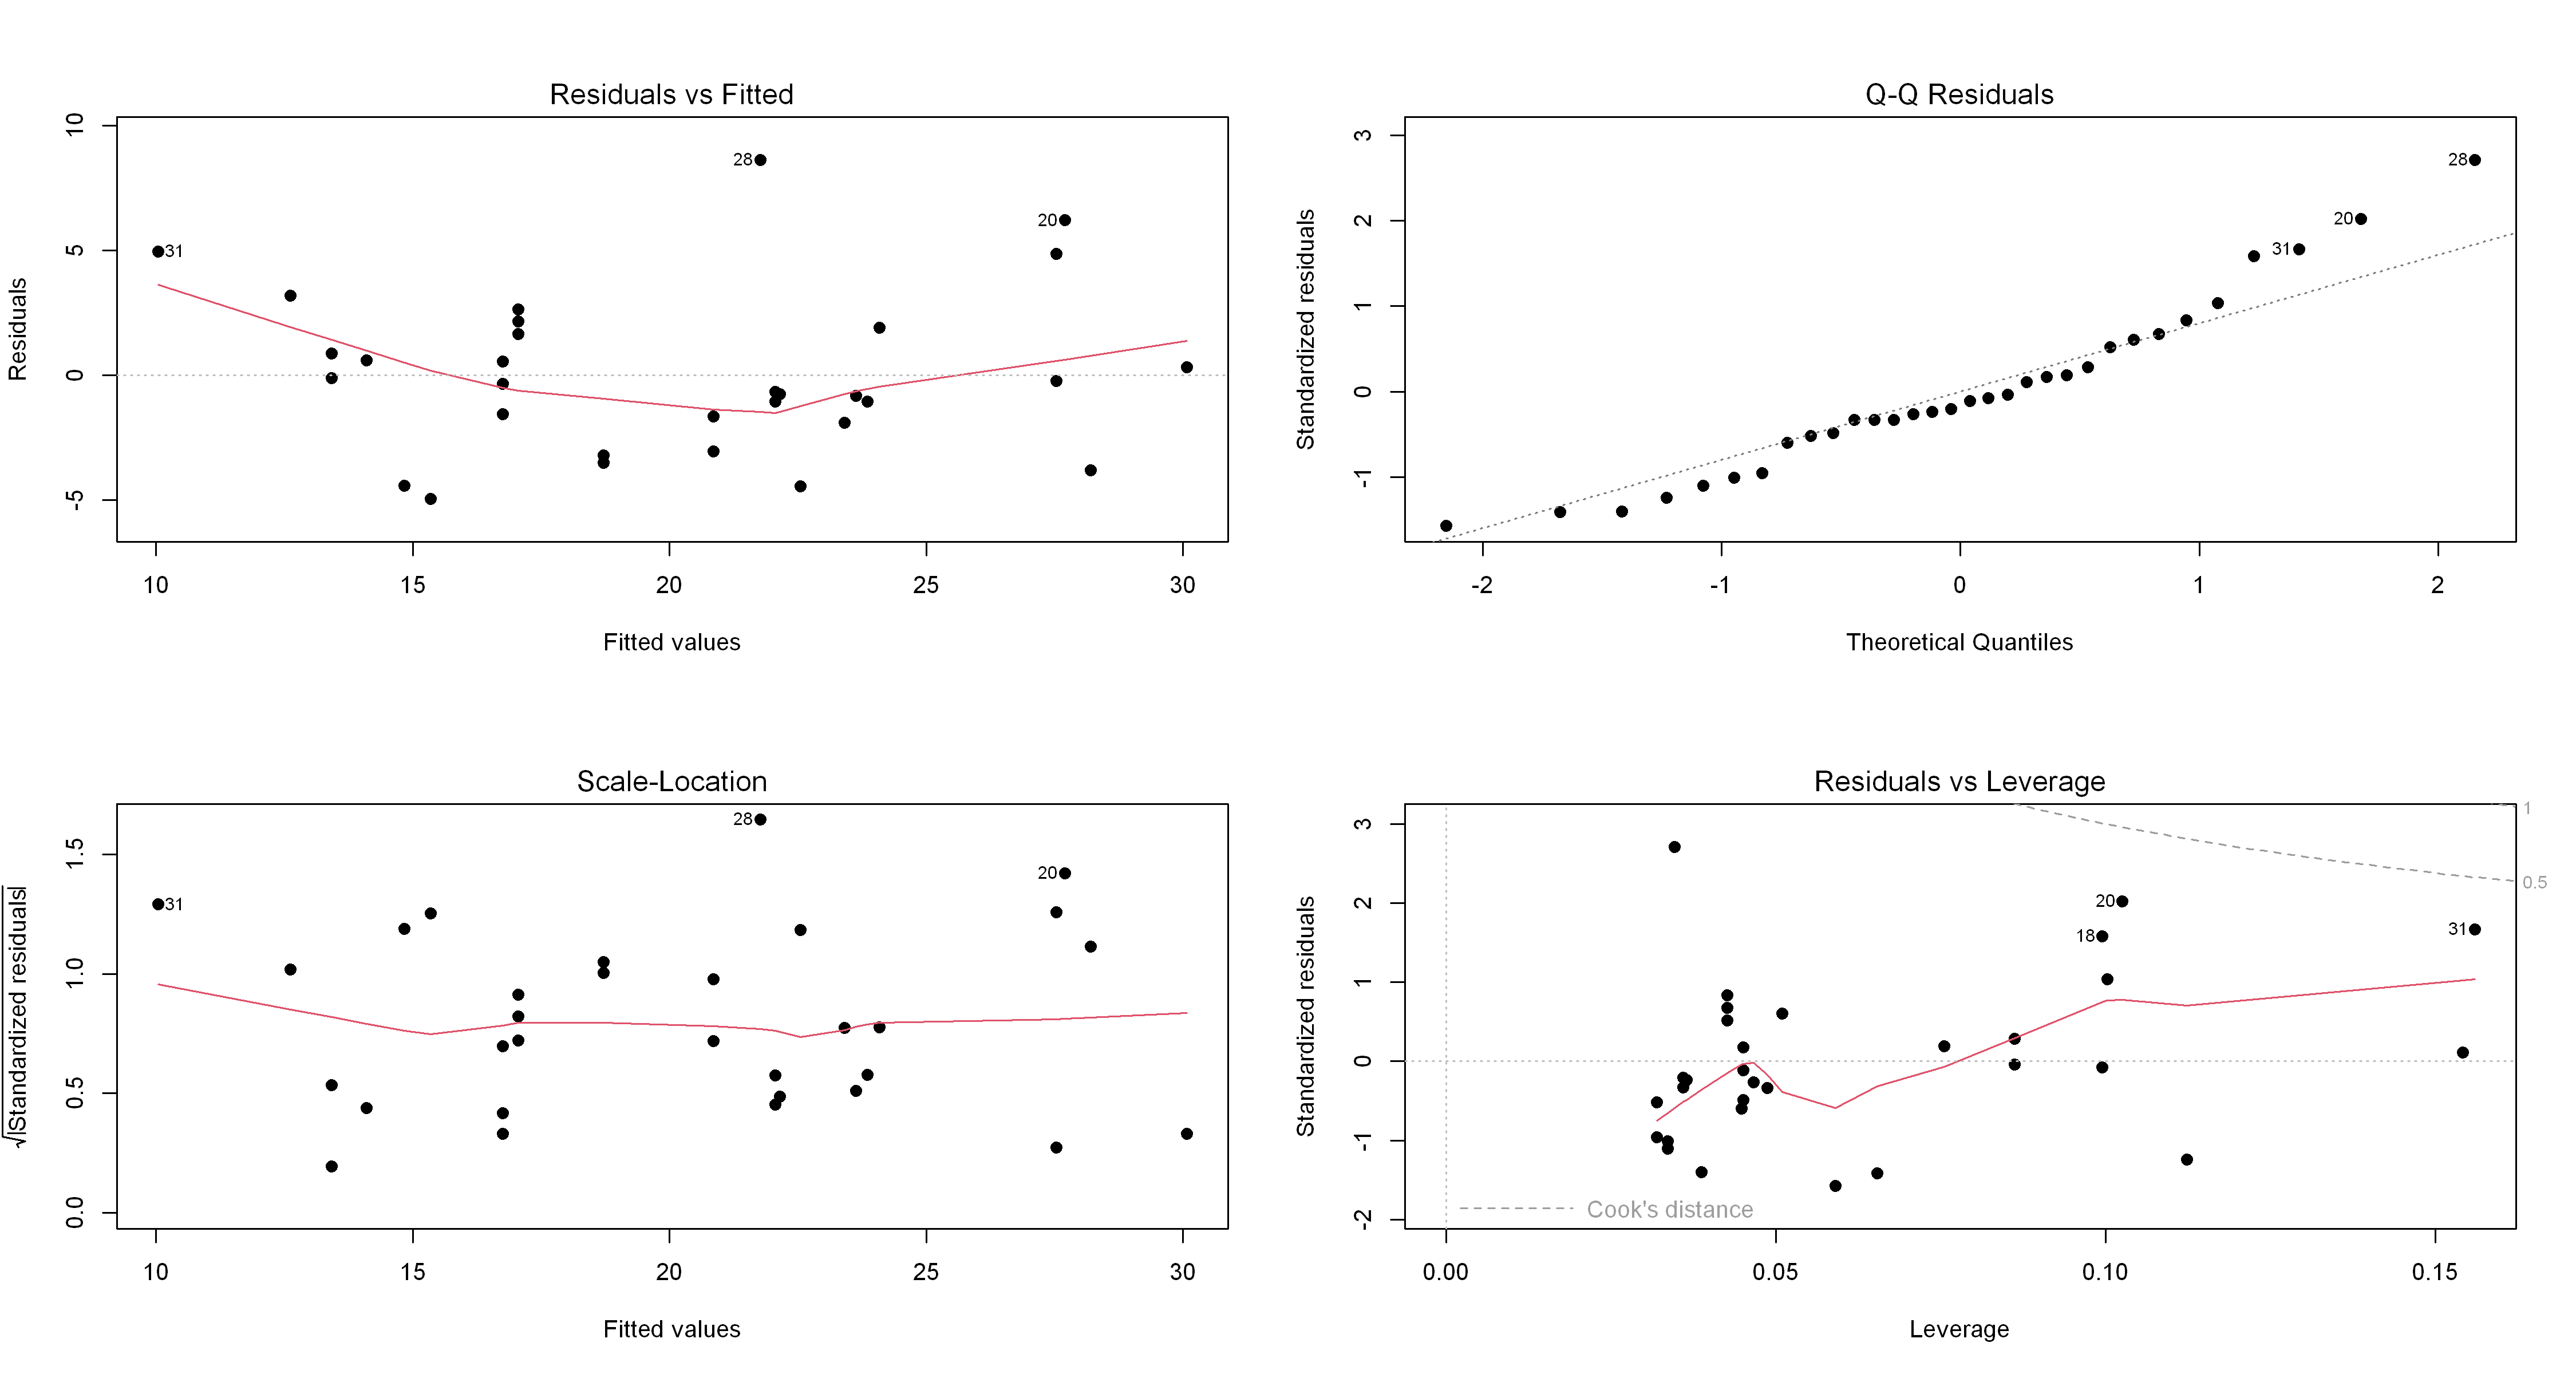

In [27]:
par(bg = 'white', mfrow = c(2, 2))
options(
    repr.plot.width = 15,    # Largura em polegadas
    repr.plot.height = 8,   # Altura em polegadas
    repr.plot.res = 300   # Resolução em dpi
)

plot(model_3, pch = 19)

In [28]:
shapiro.test(mt[, new_hp])


	Shapiro-Wilk normality test

data:  mt[, new_hp]
W = 0.97031, p-value = 0.508


In [29]:
if (0.508 > 0.05){
    'Seguem uma normal'
}

[1] "Seguem uma normal"